In [1]:
import numpy as np
import torch
from cebmf_torch.torch_ebnm_point_exp import ebnm_point_exp 

from cebmf_torch.torch_ebnm_point_laplace import ebnm_point_laplace
import matplotlib.pyplot  as plt
x = torch.tensor([1.0, 1.0, -0.5])
s = torch.tensor([1.0, 1.0, 1.0])
res = ebnm_point_exp (x, s  )
    # Expected numbers from original tests (allow small tolerance)
 

In [2]:
res.post_mean

tensor([0.3680, 0.3680, 0.2488], dtype=torch.float64)

In [3]:
res0 = ebnm_point_laplace (
    x=x,
    s=s# [alpha, beta, mu] (alpha=0 => w≈0.5, beta=0 => a=1)
)

tensor(2.1269, grad_fn=<MulBackward0>)
tensor(1.3187, grad_fn=<MulBackward0>)
tensor(0.0194, grad_fn=<MulBackward0>)
tensor(0.0169, grad_fn=<MulBackward0>)
tensor(0.0057, grad_fn=<MulBackward0>)
tensor(0.0033, grad_fn=<MulBackward0>)
tensor(0.0015, grad_fn=<MulBackward0>)
tensor(0.0008, grad_fn=<MulBackward0>)
tensor(0.0004, grad_fn=<MulBackward0>)


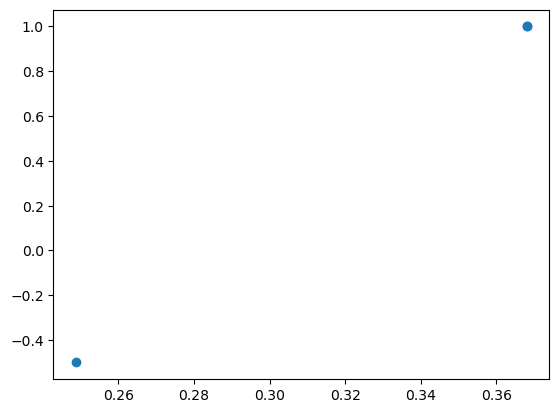

In [4]:
plt.scatter( res.post_mean, x)

In [5]:
res.log_lik # -3.636553632132083

-3.6365468502044678

In [6]:
float(res.pi0)#0.9999563044116645

1.7642974853515625e-05

In [7]:
float(res.scale)#3.047337093696241

3.0457077026367188

In [8]:
float(res.mode)# 0.0

0.0

In [9]:
import torch
import math

# If you saved the previous implementation in torch_only_point_exponential.py:
# from torch_only_point_exponential import ebnm_point_exp_solver
from cebmf_torch.torch_ebnm_point_laplace import ebnm_point_laplace
torch.manual_seed(0)
dtype = torch.float64
device = "cpu"

# Generate data (same structure as your NumPy snippet)
true_val1 = 2*torch.randn(1000, dtype=dtype, device=device)          # ~ N(0,1)
true_val0 = torch.zeros(2000, dtype=dtype, device=device)

observations_mu_1 = true_val1 + torch.randn(1000, dtype=dtype, device=device)  # add N(0,1) noise
observations_mu_0 = true_val0 + torch.randn(2000, dtype=dtype, device=device)  # add N(0,1) noise

betahat = torch.cat([observations_mu_1, observations_mu_0], dim=0)            # shape (300,)
sebetahat = torch.ones_like(betahat)                                          # all s = 1
res0 = ebnm_point_laplace (
    x=betahat,
    s=sebetahat# [alpha, beta, mu] (alpha=0 => w≈0.5, beta=0 => a=1)
)
# Fit point-exponential EBNM
res = ebnm_point_exp (
    x=betahat,
    s=sebetahat# [alpha, beta, mu] (alpha=0 => w≈0.5, beta=0 => a=1)
)


# Quick summary
 

tensor(2.1269, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(2.1568, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(2.3680, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(2.1748, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(2.1940, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(2.1832, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(2.0731, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.0411, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(1.7038, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(1.3395, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(1.1308, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.8833, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.1936, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.8162, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.7460, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.6961, dtype=torch.float64, grad_fn=<MulBackward0>)
tensor(0.6877, dtype=torch.float64, grad

In [10]:
ebnm_point_exp (
    x=betahat,
    s=sebetahat# [alpha, beta, mu] (alpha=0 => w≈0.5, beta=0 => a=1)
)

In [11]:
res0.pi0

0.5027330019116059

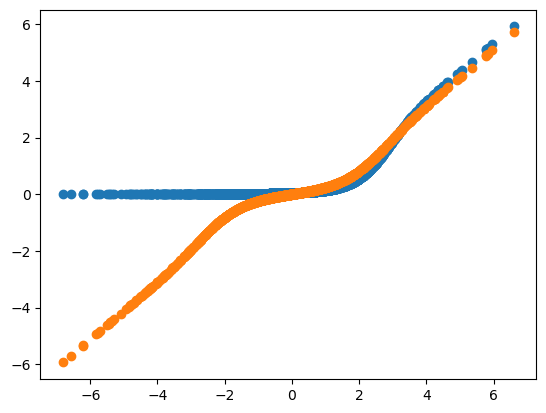

In [12]:
plt.scatter(betahat, res.post_mean   ) 
plt.scatter(betahat, res0.post_mean   ) 


In [13]:
res